In [5]:
import sys
# Alternate between ../../ and ../../src due to bug
sys.path.append("../../src")

import pandas as pd
from src.config import app_config, ProductionConfig
from src.service.exchange import ExchangeService
from src.enums import ExchangeType

prod_config = ProductionConfig()

exchange = ExchangeService().get_exchange(ExchangeType.BINANCE.value, app_config.BINANCE_API_KEY, app_config.BINANCE_API_SECRET)
prod = ExchangeService().get_exchange(ExchangeType.BINANCE.value, prod_config.BINANCE_API_KEY, prod_config.BINANCE_API_SECRET)

# Checking if the values are the same
print(exchange.get_symbol_ticker('ETHUSDT'))
print(prod.get_symbol_ticker('ETHUSDT'))

{'symbol': 'ETHUSDT', 'price': '1804.60000000'}
{'symbol': 'ETHUSDT', 'price': '1804.60000000'}


In [3]:
import pandas as pd
data = exchange.get_symbol_data('BTCUSDT', '1m', 100)

# convert to pandas dataframe
df = pd.DataFrame(data, columns=['time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
df

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1684082040000,27042.22000000,27042.35000000,27035.31000000,27035.31000000,7.03330000,1684082099999,190169.24071810,335,2.20658000,59658.78774540,0
1,1684082100000,27035.32000000,27047.55000000,27030.52000000,27030.52000000,17.57127000,1684082159999,475123.11263660,650,5.07048000,137099.15058440,0
2,1684082160000,27030.53000000,27032.24000000,27023.32000000,27023.33000000,15.02816000,1684082219999,406192.33372500,529,9.02006000,243805.42097650,0
3,1684082220000,27023.33000000,27023.33000000,27020.00000000,27020.00000000,7.56618000,1684082279999,204449.06970110,289,2.39179000,64629.75383100,0
4,1684082280000,27020.01000000,27020.01000000,27016.51000000,27017.56000000,14.25501000,1684082339999,385135.20403790,426,4.31269000,116517.10726280,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1684087740000,26936.39000000,26940.25000000,26936.38000000,26940.25000000,9.34151000,1684087799999,251657.59624200,313,5.49443000,148016.61222440,0
96,1684087800000,26940.24000000,26940.25000000,26940.24000000,26940.25000000,2.10053000,1684087859999,56588.78447430,153,0.21471000,5784.34107750,0
97,1684087860000,26940.25000000,26940.25000000,26936.87000000,26936.87000000,2.86844000,1684087919999,77268.76384140,240,1.59230000,42892.08992310,0
98,1684087920000,26936.88000000,26936.88000000,26935.91000000,26936.79000000,4.25366000,1684087979999,114577.67615900,210,3.19633000,86096.98689530,0


# Websocket live connection

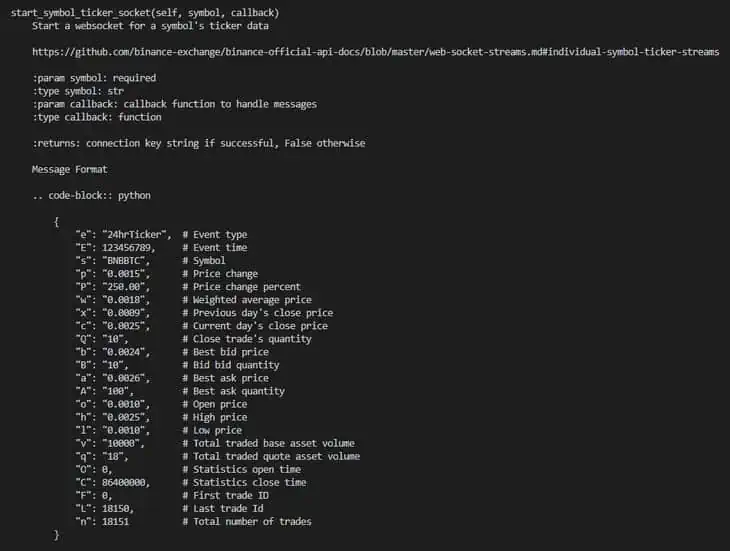

In [15]:
import time

from binance.streams import ThreadedWebsocketManager


def main():

    symbol = 'BNBBTC'

    twm = ThreadedWebsocketManager(api_key=app_config.BINANCE_API_KEY, api_secret=app_config.BINANCE_API_SECRET)
    # start is required to initialise its internal loop
    twm.start()

    def handle_socket_message(msg):
        print(f"message type: {msg['e']}")
        print(msg)

    twm.start_kline_socket(callback=handle_socket_message, symbol=symbol)

    # multiple sockets can be started
    twm.start_depth_socket(callback=handle_socket_message, symbol=symbol)

    # or a multiplex socket can be started like this
    # see Binance docs for stream names
    streams = ['bnbbtc@miniTicker', 'bnbbtc@bookTicker']
    twm.start_multiplex_socket(callback=handle_socket_message, streams=streams)

    twm.join()


if __name__ == "__main__":
   main()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/Users/rush/.pyenv/versions/3.9.16/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/rush/.pyenv/versions/3.9.16/lib/python3.9/site-packages/binance/threaded_stream.py", line 56, in run
    self._loop.run_until_complete(self.socket_listener())
  File "/Users/rush/.pyenv/versions/3.9.16/lib/python3.9/asyncio/base_events.py", line 623, in run_until_complete
    self._check_running()
  File "/Users/rush/.pyenv/versions/3.9.16/lib/python3.9/asyncio/base_events.py", line 583, in _check_running
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running
/Users/rush/.pyenv/versions/3.9.16/lib/python3.9/threading.py:982: RuntimeWarning: coroutine 'ThreadedApiManager.socket_listener' was never awaited
  self._invoke_excepthook(self)


KeyboardInterrupt: 